# This is a mobile price range classifier project which is a part of *mentorness* internship program for machine learning 

-----------------------------------------------------------------------------

A special thanks for [Mentorness](https://www.linkedin.com/company/mentorness/) for providing this opportunity and experiences that come with it !



**Problem Statement**:

>The task is to build a predictive model that can accurately classify mobile phones into predefined price
ranges based on various attributes such as battery power, camera features, memory, connectivity options,
and more. The dataset provided contains information about several mobile phones, including their
specifications and corresponding price ranges.

**Dataset Description**:

>The dataset comprises the following columns:

> battery_power: Total energy a battery can store in mAh.

> blue: Bluetooth enabled (1 if yes, 0 if no).

> clock_speed: Speed at which microprocessor executes instructions.

> dual_sim: Dual SIM support (1 if yes, 0 if no).

> fc: Front Camera mega pixels.

> four_g: 4G network support (1 if yes, 0 if no).

> int_memory: Internal Memory (in gigabytes).

> m_dep: Mobile Depth in cm.

> mobile_wt: Weight of mobile phone.

> n_cores: Number of cores of the processor.

> pc: Primary Camera mega pixels.

> px_height: Pixel Resolution Height.

> px_width: Pixel Resolution Width.

> ram: Random Access Memory in megabytes.

> sc_h: Screen Height of mobile in cm.

> sc_w: Screen Width of mobile in cm.

> talk_time: Longest time that a single battery charge will last when you are talking.

> three_g: 3G network support (1 if yes, 0 if no).

> touch_screen: Touch screen support (1 if yes, 0 if no).

> wifi: Wifi connectivity (1 if yes, 0 if no).

> price_range: Price range of the mobile phone (0 - low cost, 1 - medium cost, 2 - high cost, 3 -
very high cost).

<div class="alert alert-block alert-info">
<b>Objectives:</b>
<ol>
    <li>Exploration and Data Cleaning</li>
    <li>EDA for insights, relationships, and associations</li>
    <li>Selection of a suitable classification machine learning algorithm + performance evaluation</li>
    <li>Fine tuning the model for accuracy improvement</li>
    <li>Final Model Validation</li>
</ol>
<b>Deliverables:</b>
<ul>
    <li>Jupyter Notebook or Python script containing the code implementation.</li>
    <li>Documentation detailing the step-by-step process, including data preprocessing, model selection, evaluation metrics, and results interpretation.</li>
    <li>Visualization of key findings from EDA.</li>
    <li>Trained machine learning model for mobile price classification.</li>
    <li>Deployment instructions (if applicable).</li>
</ul>
</div>


In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [84]:
mobiles = pd.read_csv("train.csv")
mobiles_test_against = pd.read_csv("test.csv")

In [85]:
mobiles.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [86]:
mobiles_test_against.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   int64  
 1   battery_power  1000 non-null   int64  
 2   blue           1000 non-null   int64  
 3   clock_speed    1000 non-null   float64
 4   dual_sim       1000 non-null   int64  
 5   fc             1000 non-null   int64  
 6   four_g         1000 non-null   int64  
 7   int_memory     1000 non-null   int64  
 8   m_dep          1000 non-null   float64
 9   mobile_wt      1000 non-null   int64  
 10  n_cores        1000 non-null   int64  
 11  pc             1000 non-null   int64  
 12  px_height      1000 non-null   int64  
 13  px_width       1000 non-null   int64  
 14  ram            1000 non-null   int64  
 15  sc_h           1000 non-null   int64  
 16  sc_w           1000 non-null   int64  
 17  talk_time      1000 non-null   int64  
 18  three_g  

### We can observe that ``blue``,``dual_sim``,``four_G``,``three_g``,``wifi``, and ``price_range``, have been identifies as int by pandas while they represent binary categorical data, thus the conversion to categorical type.

In [87]:
mobiles[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']] = mobiles[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi', 'price_range']].astype('category')
mobiles_test_against[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']] = mobiles_test_against[['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']].astype('category')

In [88]:
mobiles.dtypes

battery_power       int64
blue             category
clock_speed       float64
dual_sim         category
fc                  int64
four_g           category
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g          category
touch_screen     category
wifi             category
price_range      category
dtype: object

In [89]:
mobiles_test_against.dtypes

id                  int64
battery_power       int64
blue             category
clock_speed       float64
dual_sim         category
fc                  int64
four_g           category
int_memory          int64
m_dep             float64
mobile_wt           int64
n_cores             int64
pc                  int64
px_height           int64
px_width            int64
ram                 int64
sc_h                int64
sc_w                int64
talk_time           int64
three_g          category
touch_screen     category
wifi             category
dtype: object

### It has been observed from the info output that there should be no null value in the ``mobiles`` set

In [90]:
mobiles.isna().any()

battery_power    False
blue             False
clock_speed      False
dual_sim         False
fc               False
four_g           False
int_memory       False
m_dep            False
mobile_wt        False
n_cores          False
pc               False
px_height        False
px_width         False
ram              False
sc_h             False
sc_w             False
talk_time        False
three_g          False
touch_screen     False
wifi             False
price_range      False
dtype: bool

In [91]:
mobiles.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [96]:
mobiles.price_range.value_counts()

price_range
0    500
1    500
2    500
3    500
Name: count, dtype: int64

### Since the price range's categories are represented as 

``(0 - low cost, 1 - medium cost, 2 - high cost, 3 - very high cost).`` > A conversion could help with clarity

In [98]:
mobiles.price_range = mobiles.price_range.map({0:'low cost',1:'medium cost',2:'high cost',3:'very hight cost'})

In [99]:
mobiles.price_range.value_counts()

price_range
low cost           500
medium cost        500
high cost          500
very hight cost    500
Name: count, dtype: int64

### Checking for outliers, a simple way is using box plots at first then deciding the statistical method to use

In [101]:
columns = ['battery_power','clock_speed','fc',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time']

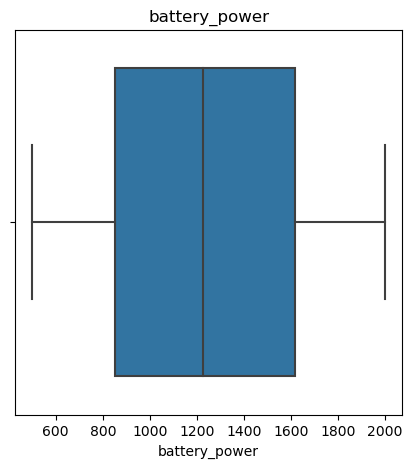

<Figure size 640x480 with 0 Axes>

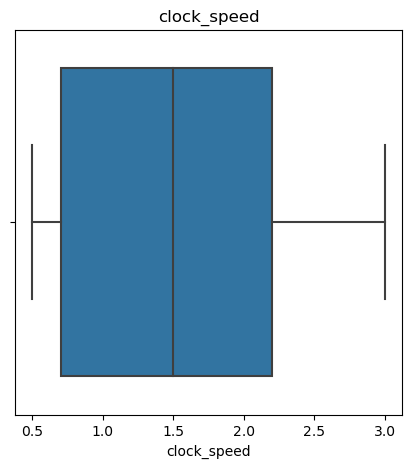

<Figure size 640x480 with 0 Axes>

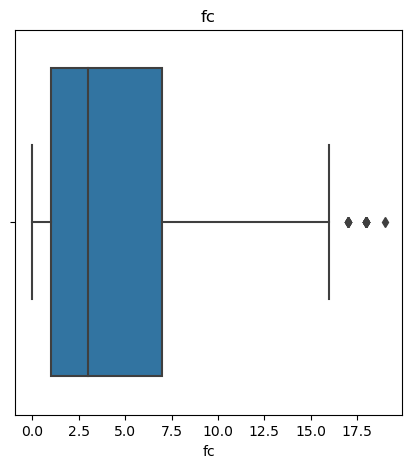

<Figure size 640x480 with 0 Axes>

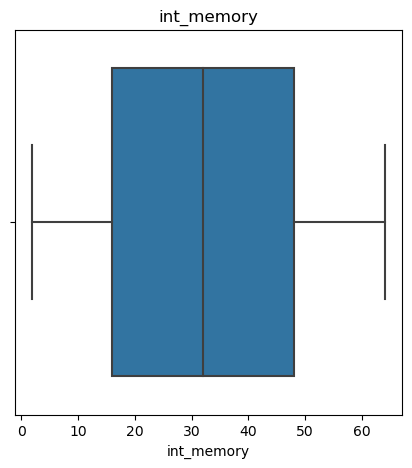

<Figure size 640x480 with 0 Axes>

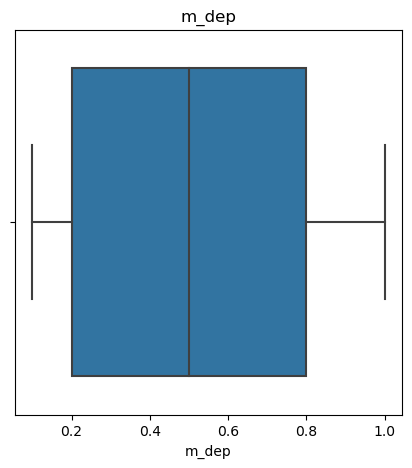

<Figure size 640x480 with 0 Axes>

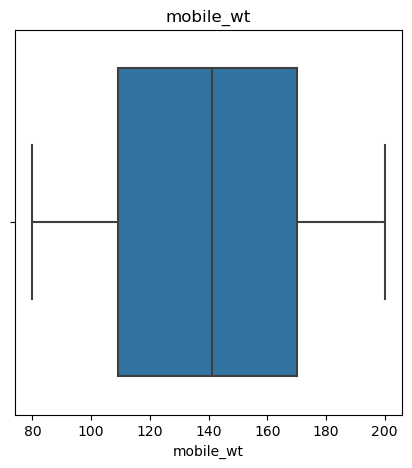

<Figure size 640x480 with 0 Axes>

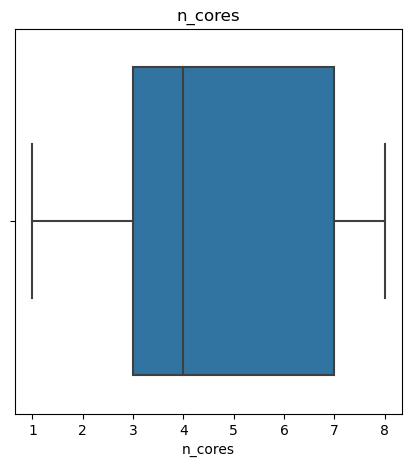

<Figure size 640x480 with 0 Axes>

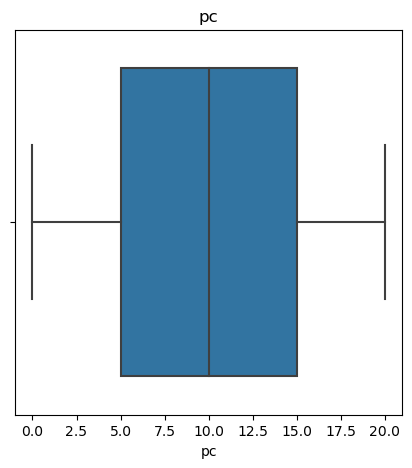

<Figure size 640x480 with 0 Axes>

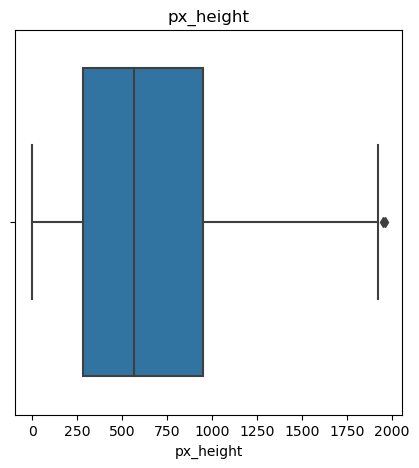

<Figure size 640x480 with 0 Axes>

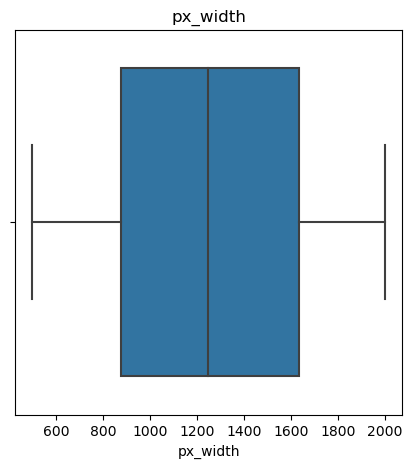

<Figure size 640x480 with 0 Axes>

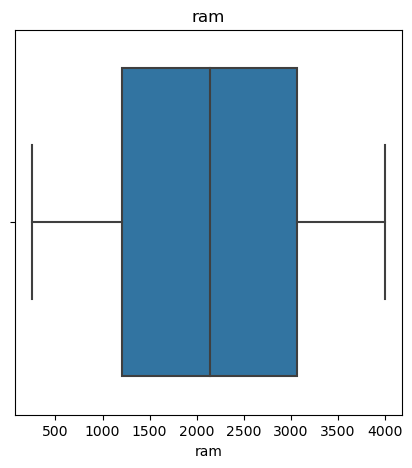

<Figure size 640x480 with 0 Axes>

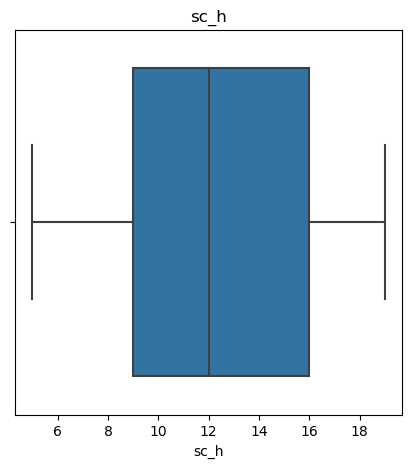

<Figure size 640x480 with 0 Axes>

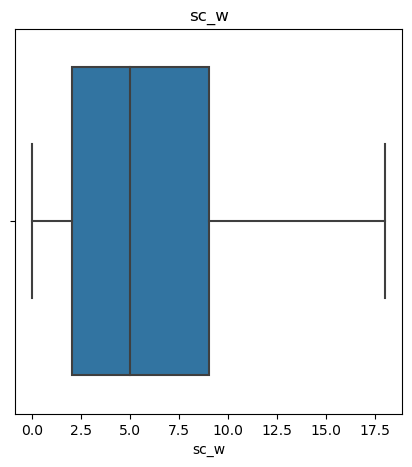

<Figure size 640x480 with 0 Axes>

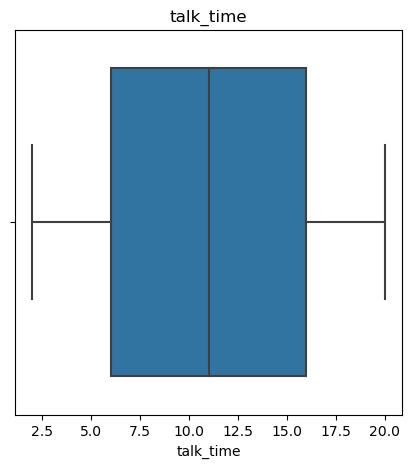

<Figure size 640x480 with 0 Axes>

In [113]:
for col in columns:
    plt.figure(figsize = (5,5))
    sns.boxplot(x = mobiles[col])
    plt.title(col)
    plt.show()
    plt.clf()

``fc``, ``px_height`` are columns who seem to have outliers as they are denoted by the Rhombus shape

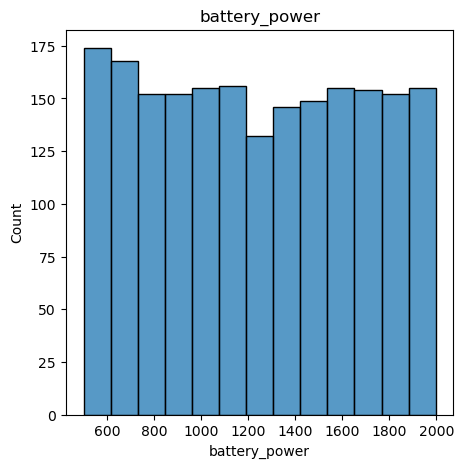

<Figure size 640x480 with 0 Axes>

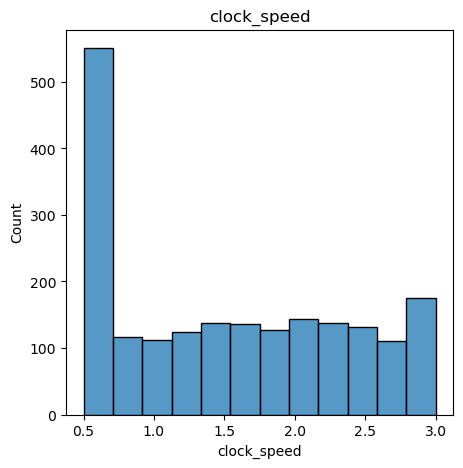

<Figure size 640x480 with 0 Axes>

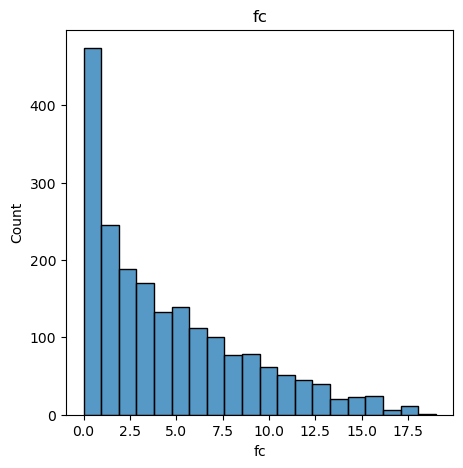

<Figure size 640x480 with 0 Axes>

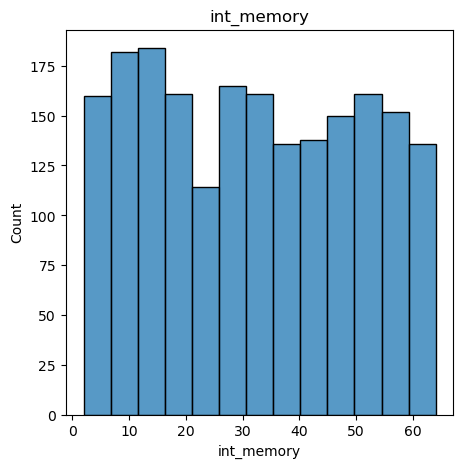

<Figure size 640x480 with 0 Axes>

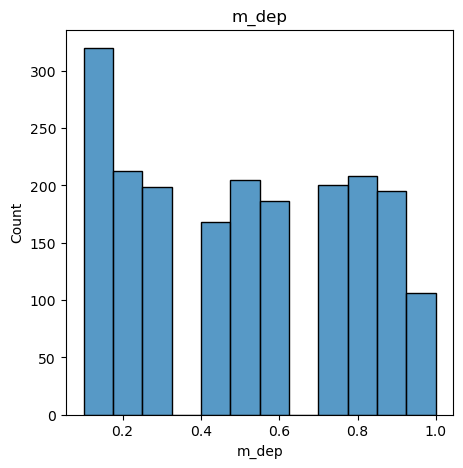

<Figure size 640x480 with 0 Axes>

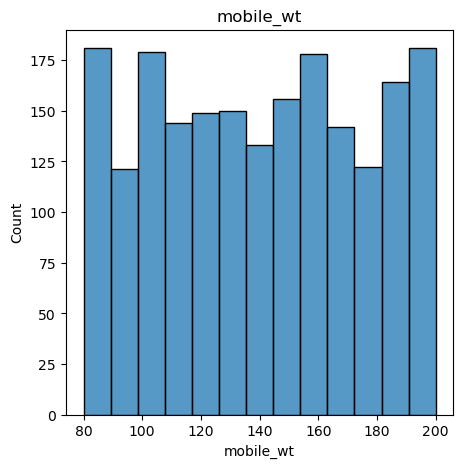

<Figure size 640x480 with 0 Axes>

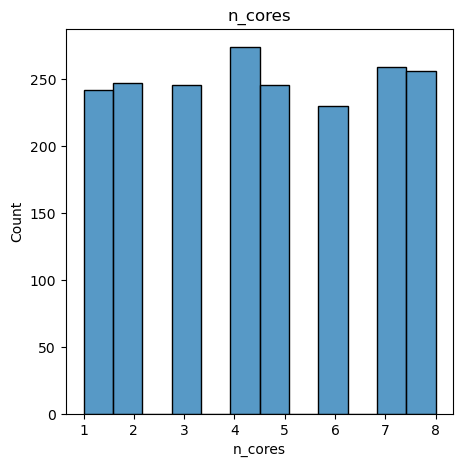

<Figure size 640x480 with 0 Axes>

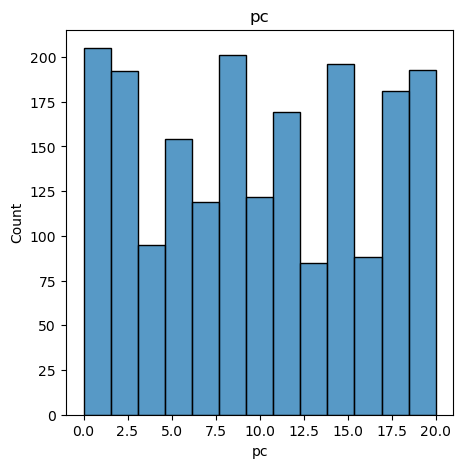

<Figure size 640x480 with 0 Axes>

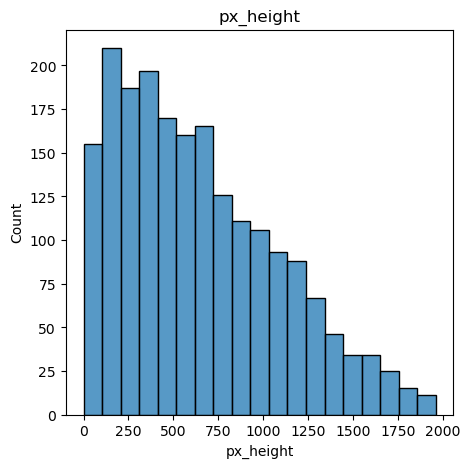

<Figure size 640x480 with 0 Axes>

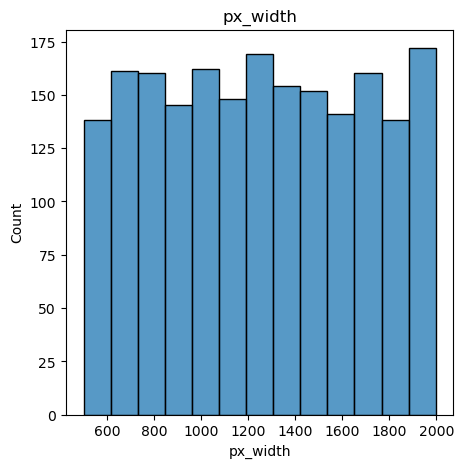

<Figure size 640x480 with 0 Axes>

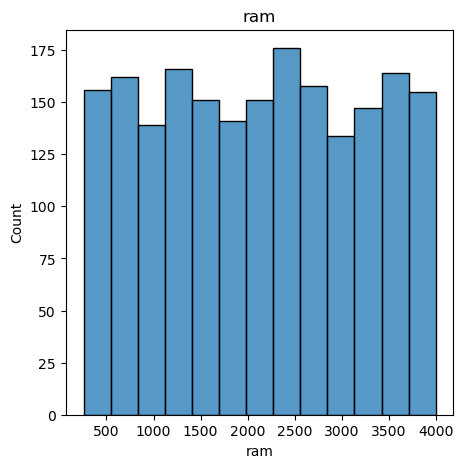

<Figure size 640x480 with 0 Axes>

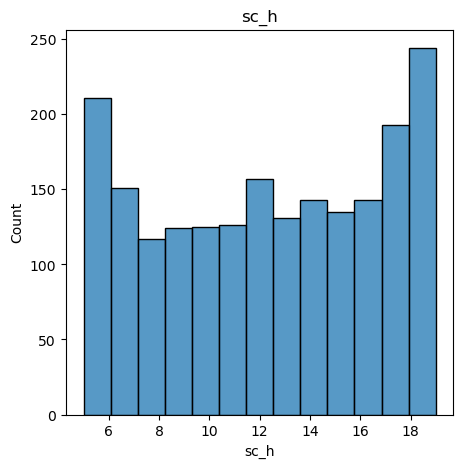

<Figure size 640x480 with 0 Axes>

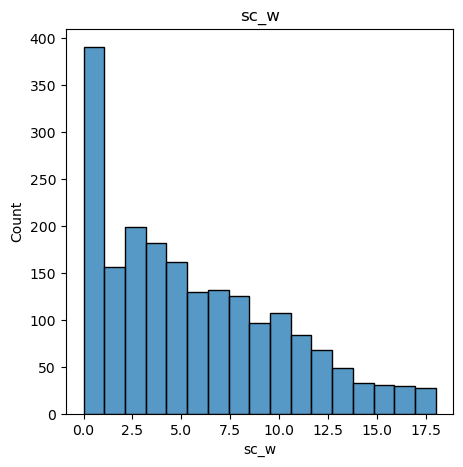

<Figure size 640x480 with 0 Axes>

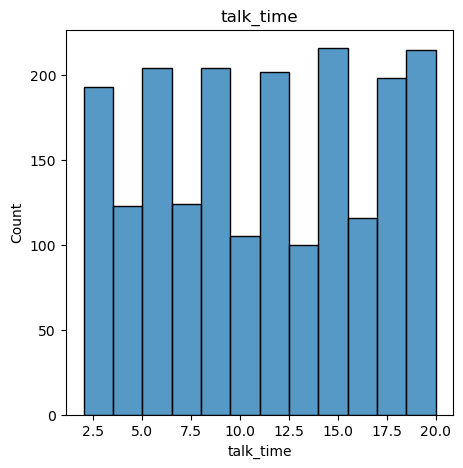

<Figure size 640x480 with 0 Axes>

In [115]:
for col in columns:
    plt.figure(figsize = (5,5))
    sns.histplot(x = mobiles[col])
    plt.title(col)
    plt.show()
    plt.clf()

### Exploratory Data Analysis